In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
loan_dataset = pd.read_csv(fr"C:\Users\TESTING\Downloads\archive\train_u6lujuX_CVtuZ9i (1).csv")


In [5]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_dataset['Dependents'].value_counts()


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [8]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [9]:
loan_dataset['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

In [10]:
loan_dataset=loan_dataset.dropna()

In [11]:
label_encoder = LabelEncoder()
loan_dataset['Self_Employed']=label_encoder.fit_transform(loan_dataset['Self_Employed'])
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
for column in loan_dataset.columns:
    if column == 'Dependents':
        continue
    else:
        if loan_dataset[column].dtype == 'object':  # Check if the column contains categorical data
            loan_dataset[column] = label_encoder.fit_transform(loan_dataset[column])
        

In [14]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
X=loan_dataset.drop(['Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
predt=model.predict(X_test)
scor=accuracy_score(predt,y_test)
scor

0.7916666666666666

<Axes: xlabel='Dependents', ylabel='count'>

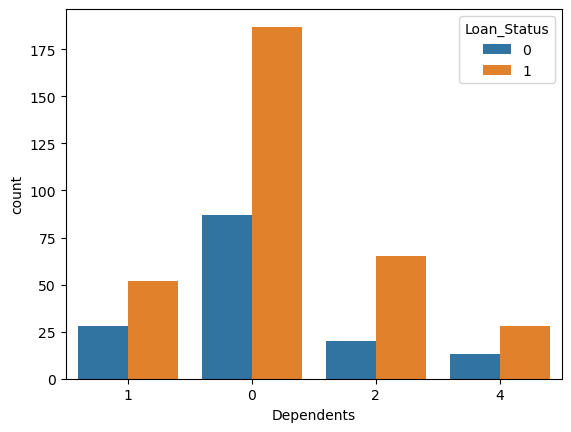

In [23]:
sns.countplot(x='Dependents',hue='',data=loan_dataset)